In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy
import numpy as np 

In [11]:
df=pd.read_csv("DESCRICAO_IMAGEM.csv",sep=';').drop("Unnamed: 0",axis=1)
df

,image,N_PROMPT,N_DESCRICAO,description,PROMPT_ID,PROMPT
0,Mulher_rosto.jpg,3,88,A imagem mostra uma jovem com cabelo castanho ...,1,\n Descreva esta imagem.\n
1,Mulher_rosto.jpg,14,71,A imagem apresenta uma jovem mulher com freckl...,2,\n Descreva esta imagem.\n Consi...
2,Mulher_rosto.jpg,17,56,A imagem apresenta uma jovem mulher. Ela possu...,3,\n Descreva esta imagem.\n Consi...
3,Mulher_rosto.jpg,25,54,A imagem apresenta uma jovem mulher com cabelo...,4,\n Descreva esta imagem.\n Consi...
4,Mulher_rosto.jpg,31,125,A imagem retrata uma jovem mulher. \n\n### Ind...,5,\n Descreva esta imagem.\n Consi...
...,...,...,...,...,...,...
305,rosquinhas.jpg,258,523,A imagem apresenta uma pilha de três donuts di...,27,\n Descreva esta imagem.\n Consi...
306,rosquinhas.jpg,264,440,A imagem retrata três donuts dispostos em uma ...,28,\n Descreva esta imagem.\n Consi...
307,rosquinhas.jpg,271,435,A imagem retrata uma pilha de três donuts empi...,29,\n Descreva esta imagem.\n Consi...
308,rosquinhas.jpg,275,437,A imagem retrata um prato contendo três donuts...,30,\n Descreva esta imagem.\n Consi...


2.376891790901777 1.0091401806427296


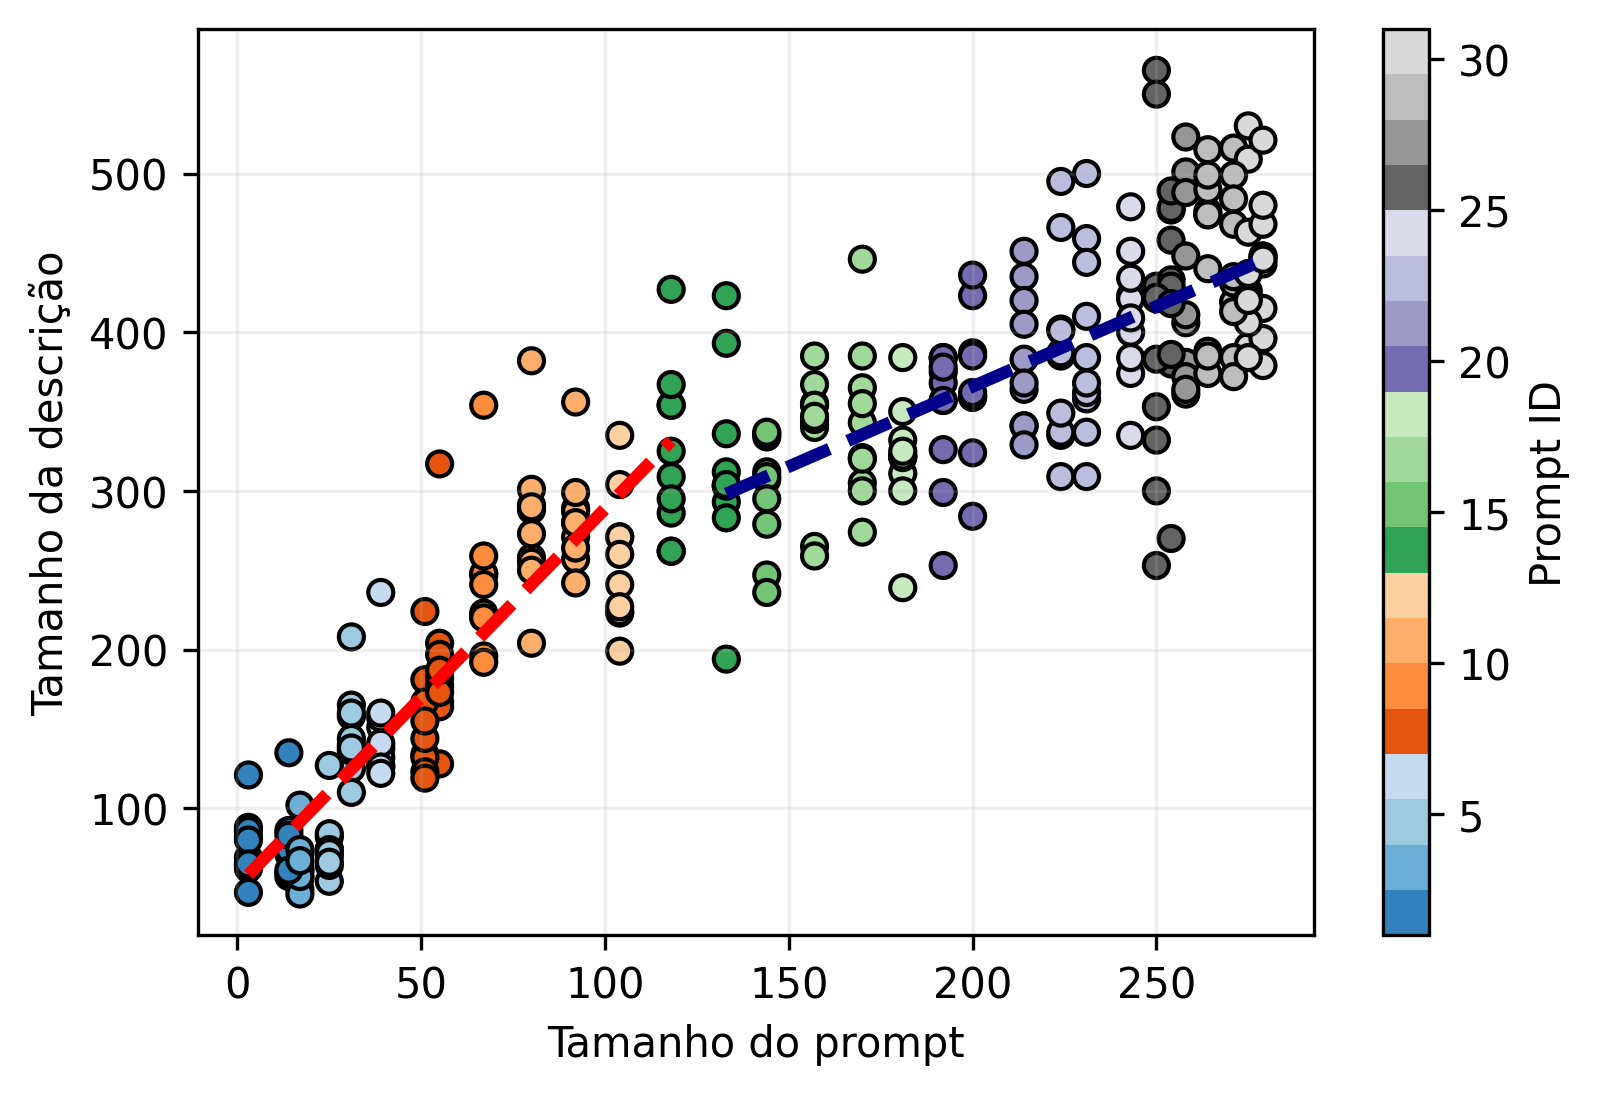

In [10]:
plt.figure(dpi=300)
plt.scatter(df.N_PROMPT,df.N_DESCRICAO,edgecolor='black',c=df.PROMPT_ID.values,cmap='tab20c')

x,y=df[df.N_PROMPT<120].N_PROMPT.values,df[df.N_PROMPT<120].N_DESCRICAO.values
res1=scipy.stats.linregress(x,y)
x1=np.linspace(x.min(),x.max())
y1=res1.slope*x1+res1.intercept
x,y=df[df.N_PROMPT>120].N_PROMPT.values,df[df.N_PROMPT>120].N_DESCRICAO.values
res2=scipy.stats.linregress(x,y)
x2=np.linspace(x.min(),x.max())
y2=res2.slope*x2+res2.intercept
plt.plot(x1,y1,ls='--',lw=3,color='red')
plt.plot(x2,y2,ls='--',lw=3,color='darkblue')

plt.colorbar(label='Prompt ID')
plt.grid(alpha=0.2)
plt.xlabel("Tamanho do prompt")
plt.ylabel("Tamanho da descrição")

print(res1.slope,res2.slope)